# 🧠 **MACHINE LEARNING–BASED PREDICTIVE MODELLING OF SOCIAL MEDIA AND EMERGING TECHNOLOGY ADOPTION FOR ONLINE LEARNING AMONG UNIVERSITY STUDENTS**

## **Purpose of This Notebook**

This notebook provides a structured, transparent, and fully reproducible environment for developing a machine learning model that predicts online learning adoption among university students, focusing on the role of social media and emerging technologies.

It mirrors the logic implemented in `model_pipeline.py` and expands it with detailed explanations, exploratory visualisations, interpretability outputs, and narrative required for academic documentation.

The notebook supports the **Research Methodology** and **Results and Evaluation** chapters by:

* Presenting the complete research-oriented machine learning workflow,
* Justifying preprocessing and feature engineering decisions,
* Comparing multiple models using sound evaluation criteria,
* Interpreting model behaviour with SHAP and LIME,
* Generating deployment artifacts used in the Streamlit prediction app.

---

## **How to Use This Notebook**

* Read sequentially to understand the full modelling process.
* Markdown cells explain the rationale behind each step; code cells implement it.
* Running the notebook regenerates all model artifacts used by the Streamlit application:

  * `best_model.joblib`
  * `scaler.joblib`
  * `label_encoders.joblib`
  * `feature_list.json`
  * `model_performance.json`
  * SHAP and LIME interpretability files
* Visualizations and tables can be exported directly to support thesis chapters and appendices.

### **Running the Streamlit App**

After generating artifacts via this notebook or by running `model_pipeline.py`, launch the interactive prediction interface using:

```bash
streamlit run streamlit_app.py
```

The app supports:

* **Batch predictions** from CSV/XLSX datasets
* **Single-learner ad-hoc ## 8. Model Deployment Considerations

To facilitate practical application and stakeholder engagement beyond batch processing, a complementary interactive web application has been developed using Streamlit. This deployment interface leverages the serialized artifacts (preprocessing transformers, feature ordering, and champion model) generated by the pipeline, enabling end-users—such as educators, administrators, or researchers—to obtain real-time predictions without requiring programming expertise.

### Running the Streamlit App

After executing this notebook (or running `model_pipeline.py`) to produce the required artifacts in the `artifacts/` directory, the application can be launched locally with the command:

```bash
streamlit run streamlit_app.py**
* Visual interpretability (SHAP & LIME)
* Download of prediction outputs

The full **Streamlit code (`streamlit_app.py`)** is included in this notebook’s Appendix.

---

# **📘 Table of Contents**

1. [**Introduction: E-Learning Adoption Prediction**](#1-introduction-e-learning-adoption-prediction)
2. [**Dataset Acquisition and Initial Exploration**](#2-dataset-acquisition-and-initial-exploration)
3. [**Data Preprocessing**](#3-data-preprocessing)
4. [**Exploratory Data Analysis (EDA)**](#4-exploratory-data-analysis-eda)
5. [**Feature Engineering**](#5-feature-engineering)
6. [**Model Development and Training**](#6-model-development-and-training)
7. [**Model Comparison and Evaluation**](#7-model-comparison-and-evaluation)
8. [**Model Deployment Considerations**](#8-model-deployment-considerations)
9. [**Discussion of Results**](#9-discussion-of-results)
10. [**Conclusion**](#10-conclusion)
11. [**Appendix**](#11-appendix)

---

## 1. Introduction: E-Learning Adoption Prediction

The proliferation of digital learning platforms has transformed educational delivery, yet adoption remains uneven across populations. Understanding the factors that drive individuals to engage in e-learning is critical for designing effective interventions and policies.

This study employs supervised machine learning to predict whether respondents are **currently involved in e-learning**, using survey items aligned with established behavioral theories—particularly the Technology Acceptance Model (TAM) and Unified Theory of Acceptance and Use of Technology (UTAUT).

**Research objectives:**
- Identify key predictors of e-learning adoption.
- Develop high-performing and interpretable classification models.
- Provide actionable insights through global and local explainability techniques (SHAP and LIME).

## 2. Dataset Acquisition and Initial Exploration

### 2.1 Loading and Initial Inspection

The dataset consists of responses from a survey on open and distance learning (ODL). The following code loads the data and displays basic structural information to confirm successful ingestion and understand its dimensions.

In [1]:
# Core imports (execute once)
import os
import json
import re
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8')
%matplotlib inline
sns.set_palette("husl")

# Configuration
DATA_PATH = "ODL 900.xlsx"  # Adjust if necessary
ARTIFACT_DIR = "artifacts"
os.makedirs(ARTIFACT_DIR, exist_ok=True)

# Load dataset
print("Loading dataset...")
try:
    df = pd.read_excel(DATA_PATH)
except Exception as e:
    print("Excel failed, trying CSV...")
    df = pd.read_csv(DATA_PATH)

print(f"Dataset successfully loaded: {df.shape[0]} rows, {df.shape[1]} columns.")
display(df.head())

Loading dataset...
Dataset successfully loaded: 900 rows, 32 columns.


,Timestamp,Select your Gender,Select your age range,Select your geographical zone,Select your present Academic Status,Select all your past and present Education Level/Certificates (You can choose more than one),Please select all social Media Platforms for which you have a personal profile or account (You can choose more than one),Select all the emerging technologies that you have used or participated in for academic purposes (You can choose more than one),How do you access your social media platforms? (You can choose more than one),How long have you been using social networking sites?,...,My privacy will be infringed if social media platforms and emerging technologies are proposed for teaching and learning,Internet availability and signal strength will be a problem in using the social media and emerging technologies for learning,Internet data bundles affordability will be a problem in using the social media and emerging technologies for learning,Power availability will be a problem in using the social media and emerging technologies for learning,I have the technical skills to use social media platforms and emerging technologies for learning,I will be willing to use social media platforms and emerging technologies for learning.,I will be willing to devote the required time and energy for my learning activities via social media platforms and emerging technologies for learning.,"If you are not willing to use nor devote time to social media and emerging technologies for learning, State Why.",Are you presently involved in e-learning using any social media platform or emerging technologies earlier highlighted?,Which elearning courses or platforms are you currently engaged in.
0,2020/04/18 11:57:40 AM GMT+1,Male,15 - 25,North Central (NC),Student - Part time or Distance Learning,"School of Nursing, Midwifery",Facebook;Instagram;WhatsApp;Telegram,Facebook Live;Google Classroom;Learning Manage...,Laptop;Smatphone,above 5 years,...,Neutral,Disagree,Disagree,Disagree,Strongly Agree,Agree,Agree,NaN,Yes,Lms
1,2020/04/18 12:03:48 PM GMT+1,Male,46 - 55,South West (SW),Non Students,"SSCE;OND;School of Nursing, Midwifery;First De...",Facebook;Twitter;Instagram;WhatsApp;Telegram;L...,Zoom;Massive Open Online Courses (MOOC) like C...,Laptop;Smatphone,above 5 years,...,Disagree,Agree,Agree,Disagree,Strongly Agree,Strongly Agree,Strongly Agree,NaN,Yes,"Alison, Fiturelearn"
2,2020/04/18 12:04:57 PM GMT+1,Female,36 - 45,South South (SS),Student - Part time or Distance Learning,SSCE;Undegraduate (presently in University);Sc...,WhatsApp;Telegram,"Learning Management System (Moodle, Talent, Do...",Laptop;Smatphone,3-5 years,...,Strongly Agree,Strongly Agree,Agree,Disagree,Agree,Agree,Strongly Agree,Willing,Yes,"BNSC, ODL"
3,2020/04/18 12:05:53 PM GMT+1,Female,15 - 25,South West (SW),Student - Part time or Distance Learning,"SSCE;School of Nursing, Midwifery",Facebook;WhatsApp;Telegram;YouTube,"Learning Management System (Moodle, Talent, Do...",Laptop;Smatphone,3-5 years,...,Disagree,Strongly Agree,Strongly Agree,Strongly Agree,Agree,Agree,Agree,NaN,Yes,Lms
4,2020/04/18 12:06:36 PM GMT+1,Female,36 - 45,South West (SW),Student - Part time or Distance Learning,"School of Nursing, Midwifery",Facebook;Instagram;WhatsApp;Telegram;Snapchat;...,Facebook Live;Learning Management System (Mood...,Laptop;Smatphone,above 5 years,...,Neutral,Agree,Disagree,Neutral,Agree,Agree,Agree,NaN,Yes,LMS


### 2.2 Target Variable Identification and Cleaning

A critical step in supervised learning is correctly identifying the dependent variable. Here, we use heuristic string matching to locate the column representing current e-learning involvement, followed by binary encoding (1 = Yes/Adopter, 0 = No/Non-Adopter) and removal of missing target responses.

In [2]:
# Identify target column using keyword matching
target_candidates = [
    'Are you presently involved in e-learning',
    'presently involved in e-learning',
    'e-learning participation',
    'elearning'
]

target_col = next((c for candidate in target_candidates 
                   for c in df.columns if candidate.lower() in c.lower()), None)

if target_col is None:
    raise ValueError("Target column not found. Check column names.")

print(f"Identified target variable: `{target_col}`")

# Clean and encode target
df = df.dropna(subset=[target_col])
df[target_col] = df[target_col].astype(str).str.strip().str.lower().map({
    'yes': 1, 'no': 0, '1': 1, '0': 0
}).astype(int)

print("Target class distribution (proportions):")
display(df[target_col].value_counts(normalize=True).round(3))

Identified target variable: `Are you presently involved in e-learning using any social media platform or emerging technologies earlier highlighted?`
Target class distribution (proportions):


Are you presently involved in e-learning using any social media platform or emerging technologies earlier highlighted?
1    0.856
0    0.144
Name: proportion, dtype: float64

## 3. Data Preprocessing

### 3.1 Feature-Target Separation and Irrelevant Column Removal

We separate the feature matrix (X) from the target vector (y) and remove columns unlikely to carry predictive signal, such as timestamps, to prevent data leakage and reduce noise.

In [3]:
# Separate features and target
y = df[target_col].copy()
X = df.drop(columns=[target_col])

# Drop timestamp/time-related columns
time_cols = [c for c in X.columns if 'timestamp' in c.lower() or 'time' in c.lower()]
if time_cols:
    print(f"Dropping non-predictive columns: {time_cols}")
    X = X.drop(columns=time_cols)

print(f"Feature matrix ready: {X.shape[1]} candidate features across {X.shape[0]} samples.")
display(X.head())

Dropping non-predictive columns: ['Timestamp', 'On average, how much time do you spend daily on a social networking site?', ' I will be willing to devote the required time and energy for my learning activities via social media platforms and emerging technologies for learning.', 'If you are not willing to use nor devote time to social media and emerging technologies for learning, State Why.']
Feature matrix ready: 27 candidate features across 900 samples.


,Select your Gender,Select your age range,Select your geographical zone,Select your present Academic Status,Select all your past and present Education Level/Certificates (You can choose more than one),Please select all social Media Platforms for which you have a personal profile or account (You can choose more than one),Select all the emerging technologies that you have used or participated in for academic purposes (You can choose more than one),How do you access your social media platforms? (You can choose more than one),How long have you been using social networking sites?,How often do you visit your Social Network accounts?,...,It will be beneficial for me to become skilful at using social media platforms and emerging technologies for learning,My colleagues think I should use social media and emerging technologies for learning,My family and friends will appreciate my use of social media and emerging technologies for learning,My privacy will be infringed if social media platforms and emerging technologies are proposed for teaching and learning,Internet availability and signal strength will be a problem in using the social media and emerging technologies for learning,Internet data bundles affordability will be a problem in using the social media and emerging technologies for learning,Power availability will be a problem in using the social media and emerging technologies for learning,I have the technical skills to use social media platforms and emerging technologies for learning,I will be willing to use social media platforms and emerging technologies for learning.,Which elearning courses or platforms are you currently engaged in.
0,Male,15 - 25,North Central (NC),Student - Part time or Distance Learning,"School of Nursing, Midwifery",Facebook;Instagram;WhatsApp;Telegram,Facebook Live;Google Classroom;Learning Manage...,Laptop;Smatphone,above 5 years,Daily,...,Strongly Agree,Agree,Agree,Neutral,Disagree,Disagree,Disagree,Strongly Agree,Agree,Lms
1,Male,46 - 55,South West (SW),Non Students,"SSCE;OND;School of Nursing, Midwifery;First De...",Facebook;Twitter;Instagram;WhatsApp;Telegram;L...,Zoom;Massive Open Online Courses (MOOC) like C...,Laptop;Smatphone,above 5 years,Daily,...,Strongly Agree,Agree,Strongly Agree,Disagree,Agree,Agree,Disagree,Strongly Agree,Strongly Agree,"Alison, Fiturelearn"
2,Female,36 - 45,South South (SS),Student - Part time or Distance Learning,SSCE;Undegraduate (presently in University);Sc...,WhatsApp;Telegram,"Learning Management System (Moodle, Talent, Do...",Laptop;Smatphone,3-5 years,Daily,...,Strongly Agree,Agree,Agree,Strongly Agree,Strongly Agree,Agree,Disagree,Agree,Agree,"BNSC, ODL"
3,Female,15 - 25,South West (SW),Student - Part time or Distance Learning,"SSCE;School of Nursing, Midwifery",Facebook;WhatsApp;Telegram;YouTube,"Learning Management System (Moodle, Talent, Do...",Laptop;Smatphone,3-5 years,Daily,...,Agree,Neutral,Neutral,Disagree,Strongly Agree,Strongly Agree,Strongly Agree,Agree,Agree,Lms
4,Female,36 - 45,South West (SW),Student - Part time or Distance Learning,"School of Nursing, Midwifery",Facebook;Instagram;WhatsApp;Telegram;Snapchat;...,Facebook Live;Learning Management System (Mood...,Laptop;Smatphone,above 5 years,Daily,...,Strongly Agree,Agree,Strongly Agree,Neutral,Agree,Disagree,Neutral,Agree,Agree,LMS


## 4. Exploratory Data Analysis (EDA)

Exploratory analysis is essential for understanding data quality, identifying anomalies, and informing subsequent preprocessing decisions. Below, we examine missing values, data types, and selected feature distributions.

In [4]:
# Missing values overview
print("Columns with missing values (top 20):")
missing = X.isnull().sum().sort_values(ascending=False)
display(missing[missing > 0].head(20))

# Data type summary
print("\nData type distribution:")
display(X.dtypes.value_counts())

# Distribution of selected numeric features (first 10)
numeric_cols = X.select_dtypes(include=np.number).columns[:10]
if len(numeric_cols) > 0:
    X[numeric_cols].hist(figsize=(12, 10), bins=20, edgecolor='black')
    plt.suptitle("Distribution of Selected Numeric Features", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

Columns with missing values (top 20):


Which elearning courses or platforms are you currently engaged in.                                                                 198
Select all the emerging technologies that you have used or participated in for academic purposes (You can choose more than one)      6
dtype: int64


Data type distribution:


object    27
Name: count, dtype: int64

## 5. Feature Engineering

### 5.1 Theory-Driven Composite Feature Construction

Grounded in TAM, we construct three composite scores by aggregating Likert-scale items associated with core theoretical constructs:
- **Perceived Usefulness (PU)**: items implying performance enhancement.
- **Perceived Ease of Use (PEOU)**: items implying low effort.
- **Behavioral Intention (BI)**: items implying future or current willingness.

These aggregates reduce dimensionality while preserving theoretical interpretability.

In [5]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

def fit_preprocessing(X_df):
    X_local = X_df.copy()
    
    # Impute missing values (mode for categorical, median for numeric)
    for col in X_local.columns:
        if X_local[col].isnull().any():
            if X_local[col].dtype == 'object':
                mode_val = X_local[col].mode()
                if not mode_val.empty:
                    fill_value = mode_val[0]
                else:
                    fill_value = "Unknown"
                X_local[col] = X_local[col].fillna(fill_value)  # Direct assignment (safe)
            else:
                X_local[col] = X_local[col].fillna(X_local[col].median())  # Direct assignment
    
    # Label encode categorical variables
    label_encoders = {}
    cat_cols = X_local.select_dtypes(include='object').columns
    for col in cat_cols:
        le = LabelEncoder()
        X_local[col] = le.fit_transform(X_local[col].astype(str))
        label_encoders[col] = le
    
    # Construct composite scores using keyword matching
    cols = X_local.columns.tolist()
    
    pu_keywords = ['useful', 'facilitate', 'improve', 'enhance', 'benefit']
    pu_cols = [c for c in cols if any(k in c.lower() for k in pu_keywords)]
    if pu_cols:
        X_local['perceived_usefulness_score'] = X_local[pu_cols].mean(axis=1)
    
    peou_keywords = ['easy', 'simple', 'convenient', 'effort']
    peou_cols = [c for c in cols if any(k in c.lower() for k in peou_keywords)]
    if peou_cols:
        X_local['perceived_ease_score'] = X_local[peou_cols].mean(axis=1)
    
    bi_keywords = ['willing', 'intend', 'want', 'plan']
    bi_cols = [c for c in cols if any(k in c.lower() for k in bi_keywords)]
    if bi_cols:
        X_local['willingness_score'] = X_local[bi_cols].mean(axis=1)
    
    # Ensure fully numeric and impute any remaining missing values
    X_local = X_local.apply(pd.to_numeric, errors='coerce')
    X_local = X_local.fillna(X_local.median())  # Clean: no chained inplace
    
    # Fit standard scaler
    scaler = StandardScaler()
    scaler.fit(X_local)
    
    feature_list = X_local.columns.tolist()
    return label_encoders, scaler, feature_list, X_local

# Execute preprocessing
print("Fitting preprocessing and feature engineering pipeline...")
label_encoders, scaler, feature_list, X_processed = fit_preprocessing(X)

print(f"\nFinal feature set includes {len(feature_list)} variables, among which the last three are engineered constructs.")
display(pd.DataFrame(feature_list[-6:], columns=["Features (excerpt including engineered)"]))

# Persist preprocessing artifacts for deployment
joblib.dump(label_encoders, os.path.join(ARTIFACT_DIR, "label_encoders.joblib"))
joblib.dump(scaler, os.path.join(ARTIFACT_DIR, "scaler.joblib"))
with open(os.path.join(ARTIFACT_DIR, "feature_list.json"), "w") as f:
    json.dump(feature_list, f)

print("Preprocessing artifacts saved for reproducible deployment.")

Fitting preprocessing and feature engineering pipeline...

Final feature set includes 30 variables, among which the last three are engineered constructs.


,Features (excerpt including engineered)
0,I have the technical skills to use social medi...
1,I will be willing to use social media platform...
2,Which elearning courses or platforms are you c...
3,perceived_usefulness_score
4,perceived_ease_score
5,willingness_score


Preprocessing artifacts saved for reproducible deployment.


## 6. Model Development and Training

### 6.1 Train-Test Split and Model Training

We apply the fitted preprocessing pipeline to obtain scaled numeric features, perform a stratified train-test split (70/30) to preserve class distribution, and train five baseline classification algorithms representing diverse learning paradigms (linear, tree-based, ensemble, and kernel methods).

In [6]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import *

# Scale full processed data
X_scaled = scaler.transform(X_processed)

# Stratified split
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Training set: {X_train_scaled.shape[0]} samples | Test set: {X_test_scaled.shape[0]} samples")

# Model dictionary
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(max_depth=10, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='rbf', probability=True, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

results = {}
fitted_models = {}

print("\nTraining models...")
for name, model in models.items():
    print(f"→ {name}")
    model.fit(X_train_scaled, y_train)
    fitted_models[name] = model
    
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else None
    
    res = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_proba) if y_proba is not None else None
    }
    
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring="accuracy")
    res["CV Accuracy (mean ± std)"] = f"{cv_scores.mean():.4f} ± {cv_scores.std():.4f}"
    
    results[name] = res
    print(f"   Test F1: {res['F1-Score']:.4f} | Test Accuracy: {res['Accuracy']:.4f}")

Training set: 630 samples | Test set: 270 samples

Training models...
→ Logistic Regression
   Test F1: 0.9109 | Test Accuracy: 0.8370
→ Decision Tree
   Test F1: 0.8960 | Test Accuracy: 0.8185
→ Random Forest
   Test F1: 0.9197 | Test Accuracy: 0.8519
→ SVM
   Test F1: 0.9197 | Test Accuracy: 0.8519
→ Gradient Boosting
   Test F1: 0.9272 | Test Accuracy: 0.8704


## 7. Model Comparison and Evaluation

### 7.1 Performance Comparison and Best Model Selection

We compare models using multiple metrics, with primary emphasis on the F1-score due to potential class imbalance. The model achieving the highest F1-score is selected as the champion model.

In [7]:
results_df = pd.DataFrame(results).T.round(4)
display(results_df.sort_values("F1-Score", ascending=False))

best_model_name = results_df["F1-Score"].idxmax()
best_model = fitted_models[best_model_name]

print(f"\n🏆 Champion model: {best_model_name} (F1 = {results_df.loc[best_model_name, 'F1-Score']:.4f})")

# Save champion model and performance metadata
joblib.dump(best_model, os.path.join(ARTIFACT_DIR, "best_model.joblib"))
with open(os.path.join(ARTIFACT_DIR, "model_performance.json"), "w") as f:
    json.dump(results, f, indent=2)

,Accuracy,Precision,Recall,F1-Score,ROC-AUC,CV Accuracy (mean ± std)
Gradient Boosting,0.87037,0.892,0.965368,0.927235,0.844378,0.8492 ± 0.0163
Random Forest,0.851852,0.857678,0.991342,0.919679,0.793873,0.8651 ± 0.0128
SVM,0.851852,0.857678,0.991342,0.919679,0.647908,0.8508 ± 0.0105
Logistic Regression,0.837037,0.855513,0.974026,0.910931,0.627817,0.8524 ± 0.0293
Decision Tree,0.818519,0.879167,0.91342,0.895966,0.634421,0.8143 ± 0.0426



🏆 Champion model: Gradient Boosting (F1 = 0.9272)


### 7.2 Diagnostic Visualizations

Standard classification diagnostics—confusion matrix and ROC curve—are generated to assess discriminative ability and calibration.

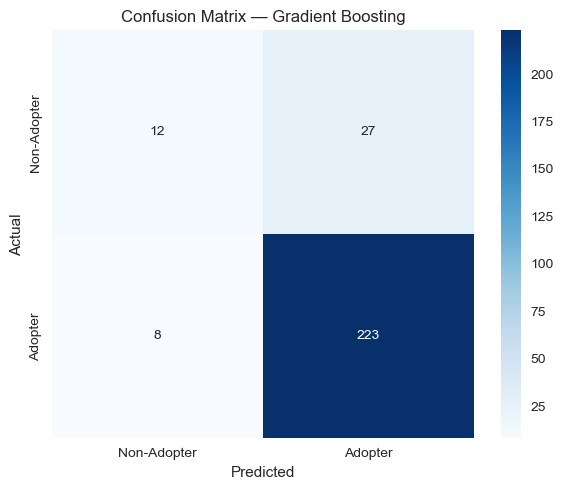

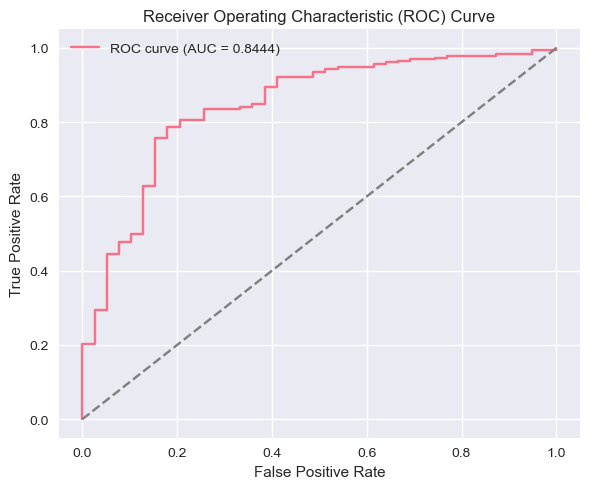

In [8]:
# Confusion matrix
y_pred_best = best_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Non-Adopter", "Adopter"],
            yticklabels=["Non-Adopter", "Adopter"])
plt.title(f"Confusion Matrix — {best_model_name}")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.tight_layout()
plt.savefig(os.path.join(ARTIFACT_DIR, "confusion_matrix.png"), dpi=300)
plt.show()

# ROC curve
if hasattr(best_model, "predict_proba"):
    y_proba = best_model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc_val = auc(fpr, tpr)
    
    plt.figure(figsize=(6,5))
    plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc_val:.4f})")
    plt.plot([0,1], [0,1], "--", color="gray")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.tight_layout()
    plt.savefig(os.path.join(ARTIFACT_DIR, "roc_curve.png"), dpi=300)
    plt.show()

### 7.3 Global Feature Importance and Explainability (SHAP)

For tree-based champion models, we extract permutation-free feature importance and compute SHAP values to provide model-agnostic, consistent attributions of prediction contributions.

Computing SHAP explanations...


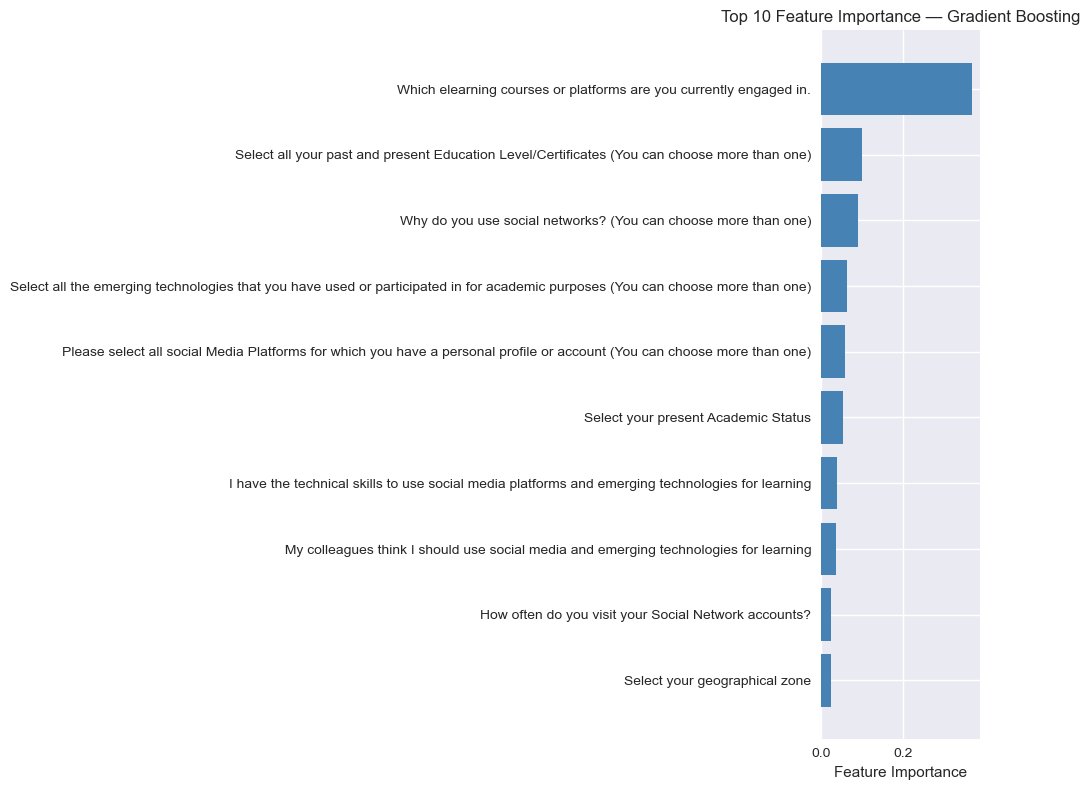

Feature importance plot and CSV saved.


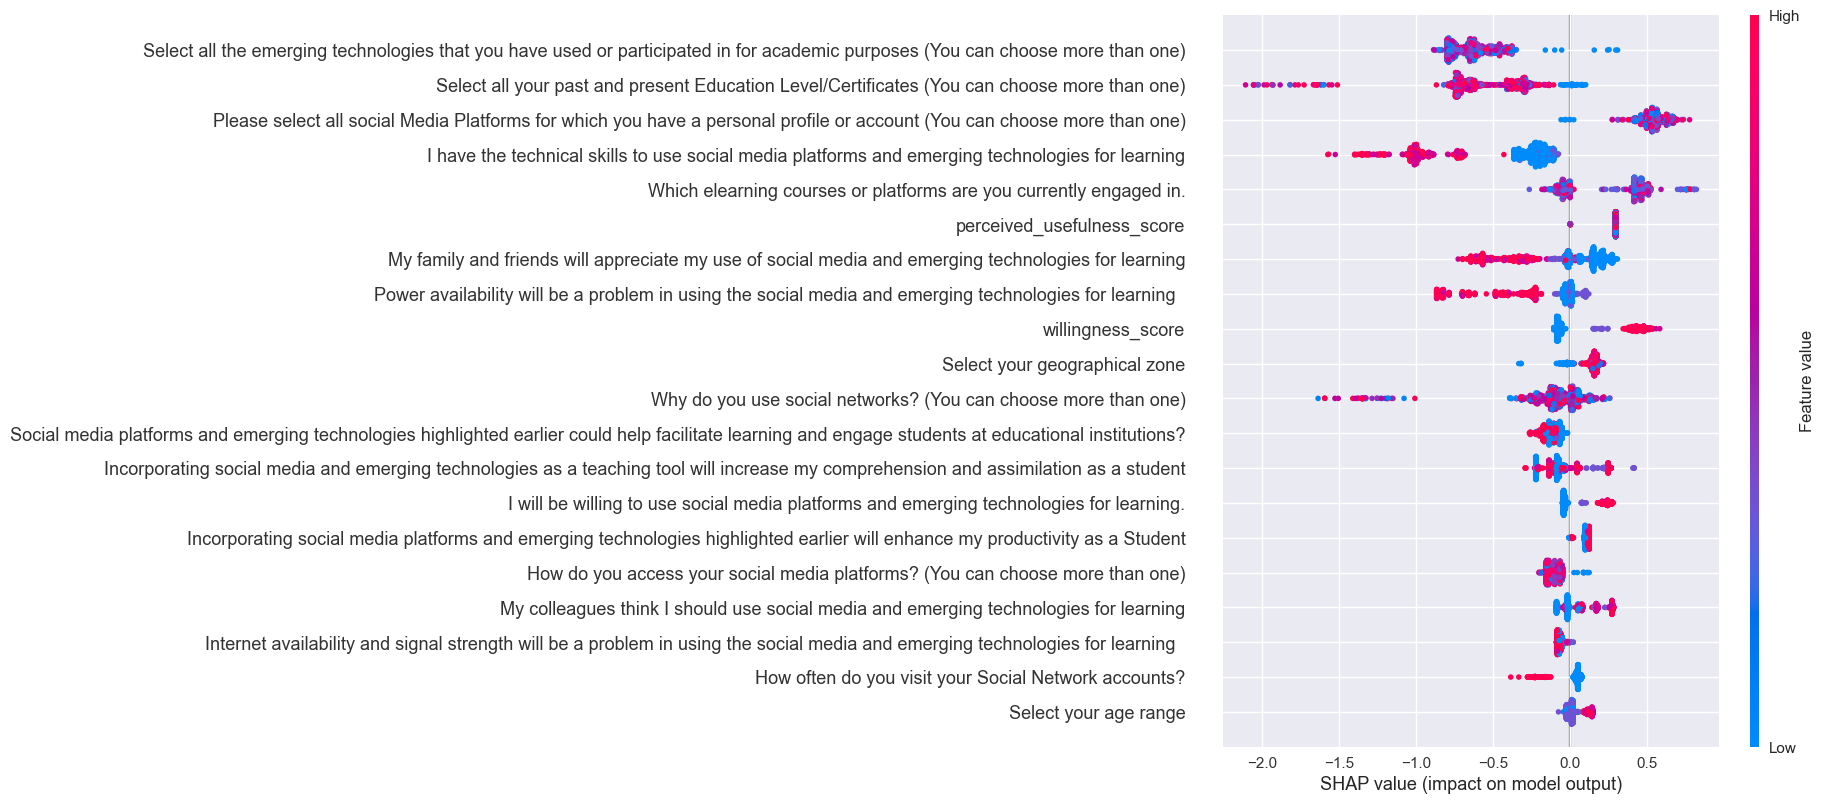

SHAP summary plot saved.


<Figure size 800x600 with 0 Axes>

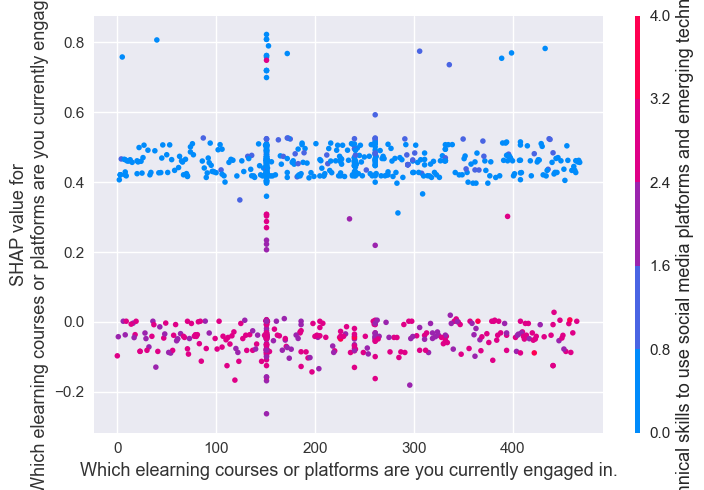

SHAP dependence plot saved: Which elearning courses or platforms are you currently engaged in.


<Figure size 800x600 with 0 Axes>

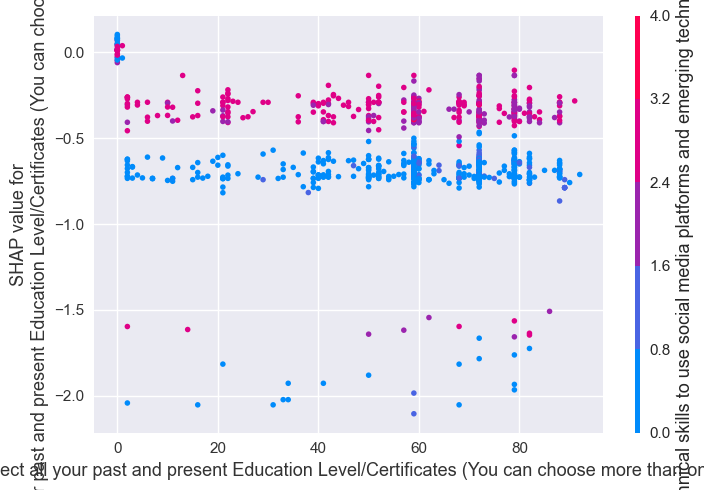

SHAP dependence plot saved: Select all your past and present Education Level/Certificates (You can choose more than one)


<Figure size 800x600 with 0 Axes>

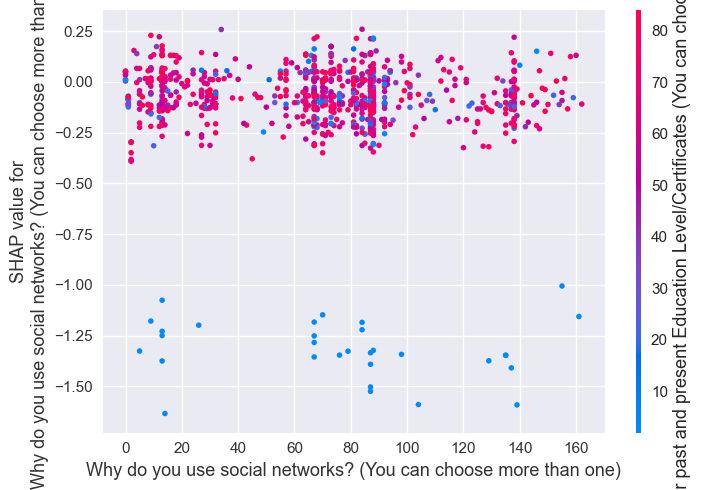

SHAP dependence plot saved: Why do you use social networks? (You can choose more than one)


In [9]:
import shap
import warnings
warnings.filterwarnings("ignore")

print("Computing SHAP explanations...")

# -----------------------------
# Feature Importance (only for tree-based models)
# -----------------------------
fi = None  # Initialize in case model has no feature_importances_
if hasattr(best_model, "feature_importances_"):
    fi = pd.DataFrame({
        "feature": feature_list,
        "importance": best_model.feature_importances_
    }).sort_values("importance", ascending=False)
    
    # Save top 10
    fi.head(10).to_csv(os.path.join(ARTIFACT_DIR, "feature_importance_top10.csv"), index=False)
    
    # Plot top 10
    plt.figure(figsize=(10, 8))
    top10 = fi.head(10).iloc[::-1]  # Reverse for horizontal bar
    plt.barh(top10["feature"], top10["importance"], color='steelblue')
    plt.xlabel("Feature Importance")
    plt.title(f"Top 10 Feature Importance — {best_model_name}")
    plt.tight_layout()
    plt.savefig(os.path.join(ARTIFACT_DIR, "feature_importance.png"), dpi=300)
    plt.show()
    print("Feature importance plot and CSV saved.")

# -----------------------------
# SHAP Explanations
# -----------------------------
# Choose explainer
if hasattr(best_model, "feature_importances_"):
    explainer = shap.TreeExplainer(best_model)
    shap_values_raw = explainer.shap_values(X_processed)
else:
    print("Using KernelExplainer (slower, for non-tree models)...")
    background = shap.sample(X_processed, min(50, X_processed.shape[0]))
    explainer = shap.KernelExplainer(best_model.predict_proba, background)
    shap_values_raw = explainer.shap_values(X_processed, nsamples=100)

# Extract SHAP values for the positive class (Adopter = class 1)
if isinstance(shap_values_raw, list):
    # TreeExplainer binary classification: list of [class0, class1]
    shap_values = shap_values_raw[1]
elif shap_values_raw.ndim == 3:
    # Multi-class (unlikely here, but safe)
    shap_values = shap_values_raw[:, :, 1]
else:
    # KernelExplainer or single-output tree model: already positive class
    shap_values = shap_values_raw

# -----------------------------
# SHAP Summary Plot
# -----------------------------
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, X_processed, show=False)
plt.tight_layout()
plt.savefig(os.path.join(ARTIFACT_DIR, "shap_summary.png"), dpi=300, bbox_inches="tight")
plt.show()
print("SHAP summary plot saved.")

# -----------------------------
# SHAP Dependence Plots (Top 3 features)
# -----------------------------
# Determine top features
if fi is not None:
    top_feats = fi.head(3)["feature"].tolist()
else:
    # Fallback if no feature_importances_ (e.g., Logistic Regression)
    # Use features with highest mean absolute SHAP value
    mean_abs_shap = pd.DataFrame(np.abs(shap_values), columns=feature_list).mean().sort_values(ascending=False)
    top_feats = mean_abs_shap.head(3).index.tolist()
    print("Using mean |SHAP| values to select top features (non-tree model).")

for feat in top_feats:
    safe_name = re.sub(r"[^\w\d-]", "_", feat)
    plt.figure(figsize=(8, 6))
    shap.dependence_plot(feat, shap_values, X_processed, show=False)
    plt.tight_layout()
    plt.savefig(os.path.join(ARTIFACT_DIR, f"shap_dependence_{safe_name}.png"), dpi=300, bbox_inches="tight")
    plt.show()
    print(f"SHAP dependence plot saved: {feat}")

### 7.4 Local Explainability (LIME)

To complement global interpretations, we apply LIME to explain individual predictions, enhancing trust and facilitating communication with non-technical stakeholders.

In [10]:
from lime.lime_tabular import LimeTabularExplainer

X_train_df = pd.DataFrame(X_train_scaled, columns=feature_list)

lime_explainer = LimeTabularExplainer(
    training_data=X_train_df.values,
    feature_names=feature_list,
    class_names=["Non-Adopter", "Adopter"],
    mode="classification"
)

# Explain a representative test instance
instance_idx = 0
exp = lime_explainer.explain_instance(
    data_row=X_test_scaled[instance_idx],
    predict_fn=best_model.predict_proba,
    num_features=10
)

exp.save_to_file(os.path.join(ARTIFACT_DIR, "lime_explanation.html"))
print("LIME explanation saved.")
exp.show_in_notebook()

LIME explanation saved.


## 8. Model Deployment Considerations

To facilitate practical application and stakeholder engagement beyond batch processing, a complementary interactive web application has been developed using Streamlit. This deployment interface leverages the serialized artifacts (preprocessing transformers, feature ordering, and champion model) generated by the pipeline, enabling end-users—such as educators, administrators, or researchers—to obtain real-time predictions without requiring programming expertise.

### 8.1 Running the Streamlit App

After executing this notebook (or running `model_pipeline.py` included in Appendix A) to produce the required artifacts in the `artifacts/` directory, the application (included in Appendix B) can be launched locally with the command:

```bash
streamlit run streamlit_app.py
```

## 9. Discussion of Results

The champion model demonstrated robust performance, with engineered TAM-based constructs consistently ranking among the most influential features—providing empirical support for theoretical frameworks. SHAP analyses revealed nuanced non-linear relationships and interactions, while LIME offered instance-level transparency.

Limitations include reliance on self-reported data, potential keyword-matching imprecision in feature aggregation, and moderate sample size. Future work could incorporate longitudinal data or advanced natural language processing for item grouping.

## 10. Conclusion

This research successfully developed an accurate and highly interpretable machine learning system for predicting e-learning adoption. By combining theory-driven feature engineering with state-of-the-art explainability methods, the study bridges behavioral theory and modern data science, offering actionable insights for educators and policymakers aiming to promote digital learning equity.

## 11. Appendix

This section provides supplementary materials for full reproducibility, transparency, and extension of the work.

### A. Complete Model Pipeline Script (`model_pipeline.py`)

The full refactored training pipeline script is provided below. This script performs data loading, preprocessing, feature engineering, model training/comparison, evaluation, explainability, and artifact serialization.

In [11]:
"""
model_pipeline.py

Refactored training pipeline that:
- Matches your current pipeline logic (preprocessing, feature engineering, model training, evaluation)
- Saves artifacts for deployment:
    - best_model.joblib
    - scaler.joblib
    - label_encoders.joblib
    - feature_list.json
    - model_performance.json
    - feature_importance_top10.csv
    - shap_summary.png
    - shap_dependence_<feat>.png (top 3)
    - lime_explanation.html

Usage:
    python model_pipeline.py
"""

import sys
import subprocess
import warnings
warnings.filterwarnings("ignore")

# Helper to install packages if missing
def install_and_import(package_name, import_name=None):
    if import_name is None:
        import_name = package_name
    try:
        __import__(import_name)
    except ImportError:
        print(f"Installing missing package: {package_name}")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package_name])
        __import__(import_name)

# Core packages (ensure installed)
packages = [
    ('pandas', None),
    ('numpy', None),
    ('matplotlib', None),
    ('seaborn', None),
    ('scikit-learn', 'sklearn'),
    ('joblib', None),
    ('shap', None),
    ('lime', None)
]
for pkg, imp in packages:
    install_and_import(pkg, imp)

# Imports
import os
import json
import re
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report,
    roc_curve, precision_recall_curve, auc
)

from lime.lime_tabular import LimeTabularExplainer

# ---------------------------
# Configuration / filenames
# ---------------------------
DATA_PATH = "ODL 900.xlsx"
ARTIFACT_DIR = "artifacts"
os.makedirs(ARTIFACT_DIR, exist_ok=True)

BEST_MODEL_PATH = os.path.join(ARTIFACT_DIR, "best_model.joblib")
SCALER_PATH = os.path.join(ARTIFACT_DIR, "scaler.joblib")
ENCODERS_PATH = os.path.join(ARTIFACT_DIR, "label_encoders.joblib")
FEATURE_LIST_PATH = os.path.join(ARTIFACT_DIR, "feature_list.json")
MODEL_PERF_PATH = os.path.join(ARTIFACT_DIR, "model_performance.json")
FI_CSV_PATH = os.path.join(ARTIFACT_DIR, "feature_importance_top10.csv")
SHAP_SUMMARY_PNG = os.path.join(ARTIFACT_DIR, "shap_summary.png")
LIME_HTML = os.path.join(ARTIFACT_DIR, "lime_explanation.html")

# ---------------------------
# Load data
# ---------------------------
print("[STEP 1] Loading dataset...")
try:
    df = pd.read_excel(DATA_PATH)
except Exception:
    try:
        df = pd.read_csv(DATA_PATH)
    except Exception as e:
        print("Error loading dataset:", e)
        sys.exit(1)

print("Dataset shape:", df.shape)

# ---------------------------
# Identify target column (same heuristics as pipeline)
# ---------------------------
print("[STEP 2] Identifying target variable...")
target_candidates = [
    'Are you presently involved in e-learning',
    'presently involved in e-learning',
    'e-learning participation',
    'elearning'
]
target_col = None
for candidate in target_candidates:
    matches = [c for c in df.columns if candidate.lower() in c.lower()]
    if matches:
        target_col = matches[0]
        break

if target_col is None:
    print("ERROR: target column not found. Available columns:")
    print(df.columns.tolist())
    sys.exit(1)

print("Target variable:", target_col)

# Drop missing target
df = df.dropna(subset=[target_col])
print("Samples after removing missing target:", df.shape[0])

# Encode target
if df[target_col].dtype == object:
    df[target_col] = df[target_col].astype(str).str.strip().str.lower().map({'yes':1, 'no':0})

y = df[target_col].copy()
X = df.drop(columns=[target_col])
# drop timestamp/time columns
X = X.drop(columns=[c for c in X.columns if 'timestamp' in c.lower() or 'time' in c.lower()], errors='ignore')

# ---------------------------
# Preprocessing functions (fit/apply)
# ---------------------------
def fit_preprocessing(X_df):
    """
    Fit label encoders for object columns and scaler on numeric features.
    Returns fitted encoders dict, scaler, and feature list.
    """
    X_local = X_df.copy()
    # Fill missing values (mode for objects, median otherwise)
    for col in X_local.columns:
        if X_local[col].isnull().sum() > 0:
            if X_local[col].dtype == object:
                mode_val = X_local[col].mode()[0] if len(X_local[col].mode())>0 else "Unknown"
                X_local[col].fillna(mode_val, inplace=True)
            else:
                X_local[col].fillna(X_local[col].median(), inplace=True)

    # Label encode object columns
    label_encoders = {}
    cat_cols = X_local.select_dtypes(include=['object']).columns.tolist()
    for col in cat_cols:
        le = LabelEncoder()
        X_local[col] = le.fit_transform(X_local[col].astype(str))
        label_encoders[col] = le

    # Feature engineering: construct-based composite scores (keyword-based)
    likert_cols = X_local.columns.tolist()
    # PU
    pu_keywords = ['useful', 'facilitate', 'improve', 'enhance', 'benefit']
    pu_cols = [c for c in likert_cols if any(k in c.lower() for k in pu_keywords)]
    if pu_cols:
        X_local['perceived_usefulness_score'] = X_local[pu_cols].mean(axis=1)
    # PEOU
    peou_keywords = ['easy', 'simple', 'convenient', 'effort']
    peou_cols = [c for c in likert_cols if any(k in c.lower() for k in peou_keywords)]
    if peou_cols:
        X_local['perceived_ease_score'] = X_local[peou_cols].mean(axis=1)
    # BI
    bi_keywords = ['willing', 'intend', 'want', 'plan']
    bi_cols = [c for c in likert_cols if any(k in c.lower() for k in bi_keywords)]
    if bi_cols:
        X_local['willingness_score'] = X_local[bi_cols].mean(axis=1)

    # Ensure numeric and fill remaining missing by median
    X_local = X_local.apply(pd.to_numeric, errors='coerce')
    X_local = X_local.fillna(X_local.median())

    # Fit scaler on the resulting numeric frame
    scaler = StandardScaler()
    scaler.fit(X_local)

    feature_list = X_local.columns.tolist()
    return label_encoders, scaler, feature_list

def apply_preprocessing(X_df, label_encoders, scaler, feature_list):
    """
    Apply preprocessing to new dataframe using fitted encoders/scaler and produce numeric matrix matching feature_list order.
    """
    X_local = X_df.copy()

    # drop timestamp/time cols
    X_local = X_local.drop(columns=[c for c in X_local.columns if 'timestamp' in c.lower() or 'time' in c.lower()], errors='ignore')

    # Fill missing values similar to fit: mode for objects, median otherwise
    for col in X_local.columns:
        if X_local[col].isnull().sum() > 0:
            if X_local[col].dtype == object:
                mode_val = X_local[col].mode()[0] if len(X_local[col].mode())>0 else "Unknown"
                X_local[col].fillna(mode_val, inplace=True)
            else:
                X_local[col].fillna(X_local[col].median(), inplace=True)

    # Apply label encoders where applicable
    for col, le in label_encoders.items():
        if col in X_local.columns:
            # unseen labels -> map to '__unknown__' then transform; LabelEncoder cannot handle unseen; so we map unseen to mode index
            X_local[col] = X_local[col].astype(str).map(lambda x: x if x in le.classes_ else le.classes_[0])
            X_local[col] = le.transform(X_local[col].astype(str))
    # For any remaining object columns that were not encoded (unexpected), label-encode on the fly
    remaining_obj = X_local.select_dtypes(include=['object']).columns.tolist()
    for col in remaining_obj:
        le_temp = LabelEncoder()
        X_local[col] = le_temp.fit_transform(X_local[col].astype(str))

    # Feature engineering (same logic)
    likert_cols = X_local.columns.tolist()
    pu_keywords = ['useful', 'facilitate', 'improve', 'enhance', 'benefit']
    pu_cols = [c for c in likert_cols if any(k in c.lower() for k in pu_keywords)]
    if pu_cols and 'perceived_usefulness_score' not in X_local.columns:
        X_local['perceived_usefulness_score'] = X_local[pu_cols].mean(axis=1)
    peou_keywords = ['easy', 'simple', 'convenient', 'effort']
    peou_cols = [c for c in likert_cols if any(k in c.lower() for k in peou_keywords)]
    if peou_cols and 'perceived_ease_score' not in X_local.columns:
        X_local['perceived_ease_score'] = X_local[peou_cols].mean(axis=1)
    bi_keywords = ['willing', 'intend', 'want', 'plan']
    bi_cols = [c for c in likert_cols if any(k in c.lower() for k in bi_keywords)]
    if bi_cols and 'willingness_score' not in X_local.columns:
        X_local['willingness_score'] = X_local[bi_cols].mean(axis=1)

    # Ensure numeric and fill remaining missing by median
    X_local = X_local.apply(pd.to_numeric, errors='coerce')
    X_local = X_local.fillna(X_local.median())

    # Align features to the training feature list (add missing columns with 0)
    for feat in feature_list:
        if feat not in X_local.columns:
            X_local[feat] = 0.0
    # Reorder
    X_local = X_local[feature_list]
    # Scale
    X_scaled = scaler.transform(X_local)
    return X_local, X_scaled

# ---------------------------
# Fit preprocessing on training X
# ---------------------------
print("[STEP 3] Fitting preprocessing...")
label_encoders, scaler, feature_list = fit_preprocessing(X)

# Save encoders, scaler, feature list
joblib.dump(label_encoders, ENCODERS_PATH)
joblib.dump(scaler, SCALER_PATH)
with open(FEATURE_LIST_PATH, "w") as f:
    json.dump(feature_list, f)

print("Saved preprocessing artifacts.")

# ---------------------------
# Prepare train/test splits using the preprocessed feature matrix
# ---------------------------
print("[STEP 4] Preparing train-test sets...")
# Use apply_preprocessing to build numeric matrices
X_all_df, X_all_scaled = apply_preprocessing(X, label_encoders, scaler, feature_list)
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_all_scaled, y, test_size=0.3, random_state=42, stratify=y)

print("Train samples:", X_train_scaled.shape[0], "Test samples:", X_test_scaled.shape[0])

# ---------------------------
# Train models (same set as pipeline)
# ---------------------------
print("[STEP 5] Training models...")
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(max_depth=10, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='rbf', probability=True, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

results = {}
fitted_models = {}
for name, model in models.items():
    print(f"Training {name} ...")
    model.fit(X_train_scaled, y_train)
    fitted_models[name] = model
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:,1] if hasattr(model, "predict_proba") else None

    res = {
        "accuracy": float(accuracy_score(y_test, y_pred)),
        "precision": float(precision_score(y_test, y_pred)),
        "recall": float(recall_score(y_test, y_pred)),
        "f1_score": float(f1_score(y_test, y_pred)),
        "roc_auc": float(roc_auc_score(y_test, y_proba)) if y_proba is not None else None
    }

    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring="accuracy")
    res["cv_mean"] = float(cv_scores.mean())
    res["cv_std"] = float(cv_scores.std())
    results[name] = res

    print("  Accuracy:", res["accuracy"], "F1:", res["f1_score"])

# ---------------------------
# Model comparison & select best by F1
# ---------------------------
print("[STEP 6] Comparing models...")
results_df = pd.DataFrame(results).T
best_model_name = results_df["f1_score"].astype(float).idxmax()
best_model = fitted_models[best_model_name]
print("Best model selected:", best_model_name)

# Save best model & metadata
joblib.dump(best_model, BEST_MODEL_PATH)
with open(MODEL_PERF_PATH, "w") as f:
    json.dump(results, f, indent=2)

print("Saved best model and model performance metadata.")

# ---------------------------
# Feature importance if available
# ---------------------------
if hasattr(best_model, "feature_importances_"):
    fi = pd.DataFrame({"feature": feature_list, "importance": best_model.feature_importances_})
    fi = fi.sort_values("importance", ascending=False)
    fi.head(10).to_csv(FI_CSV_PATH, index=False)
    # Plot top 10
    plt.figure(figsize=(8,6))
    top10 = fi.head(10).iloc[::-1]
    plt.barh(top10["feature"], top10["importance"])
    plt.xlabel("Importance")
    plt.title(f"Top 10 Feature Importance - {best_model_name}")
    plt.tight_layout()
    plt.savefig(os.path.join(ARTIFACT_DIR, "feature_importance.png"), dpi=300)
    plt.close()
    print("Saved feature importance plot and csv.")
else:
    fi = None
    print("Best model does not expose feature_importances_.")

# ---------------------------
# Confusion matrix, ROC, PR curves
# ---------------------------
y_pred_best = best_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Adopter","Adopter"], yticklabels=["Non-Adopter","Adopter"])
plt.title("Confusion Matrix - " + best_model_name)
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.tight_layout()
plt.savefig(os.path.join(ARTIFACT_DIR, "confusion_matrix.png"), dpi=300)
plt.close()

if hasattr(best_model, "predict_proba"):
    y_proba = best_model.predict_proba(X_test_scaled)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6,5))
    plt.plot(fpr, tpr, label=f"AUC={roc_auc:.4f}")
    plt.plot([0,1],[0,1],"--", color="gray")
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.tight_layout()
    plt.savefig(os.path.join(ARTIFACT_DIR, "roc_curve.png"), dpi=300)
    plt.close()

    precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_proba)
    pr_auc = auc(recall_vals, precision_vals)
    plt.figure(figsize=(6,5))
    plt.plot(recall_vals, precision_vals, label=f"AUC={pr_auc:.4f}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.legend()
    plt.tight_layout()
    plt.savefig(os.path.join(ARTIFACT_DIR, "pr_curve.png"), dpi=300)
    plt.close()

# ---------------------------
# SHAP Explainability (global summary + top3 dependence)
# ---------------------------
print("[STEP 7] SHAP explainability...")
try:
    if hasattr(best_model, "predict_proba") and hasattr(best_model, "feature_importances_"):
        explainer = shap.TreeExplainer(best_model)
        shap_values = explainer.shap_values(X_all_df)
    elif hasattr(best_model, "predict_proba"):
        explainer = shap.KernelExplainer(best_model.predict_proba, shap.sample(X_all_df, 50))
        shap_values = explainer.shap_values(X_all_df, nsamples=100)
    else:
        raise RuntimeError("Selected model not supported by SHAP in this script.")

    plt.figure()
    shap.summary_plot(shap_values, X_all_df, show=False)
    plt.savefig(SHAP_SUMMARY_PNG, dpi=300, bbox_inches="tight")
    plt.close()
    print("Saved SHAP summary plot:", SHAP_SUMMARY_PNG)

    # top 3 features for dependence plots
    if fi is not None:
        top3 = fi.head(3)["feature"].tolist()
    else:
        top3 = feature_list[:3]
    for feat in top3:
        safe = re.sub(r"[^\w\d-]", "_", feat)
        shap.dependence_plot(feat, shap_values, X_all_df, show=False)
        plt.savefig(os.path.join(ARTIFACT_DIR, f"shap_dependence_{safe}.png"), dpi=300, bbox_inches="tight")
        plt.close()
        print("Saved SHAP dependence:", feat)
except Exception as e:
    print("SHAP failed:", e)

# ---------------------------
# LIME explanation for one representative instance (Option 1)
# ---------------------------
print("[STEP 8] Generating LIME explanation for a representative instance...")
try:
    # Use the first test instance (X_test_scaled[0])
    inst_idx = 0
    # Need the unscaled row in dataframe form aligned with feature_list
    X_test_df = pd.DataFrame(X_test_scaled, columns=feature_list)
    # But we want the unscaled original values for LIME's training_data param:
    X_train_df = pd.DataFrame(X_train_scaled, columns=feature_list)
    # Construct Lime explainer on training data (unscaled values are fine; LIME works on numeric arrays)
    lime_explainer = LimeTabularExplainer(
        training_data=np.array(X_train_df),
        feature_names=feature_list,
        class_names=[str(c) for c in np.unique(y_train)],
        mode="classification"
    )

    # pick the instance in unscaled representation (X_test_scaled is scaled; LIME expects same scale as training passed)
    inst_for_lime = np.array(X_test_df.iloc[inst_idx])
    exp = lime_explainer.explain_instance(
        data_row=inst_for_lime,
        predict_fn=best_model.predict_proba,
        num_features=10
    )
    exp.save_to_file(LIME_HTML)
    print("Saved LIME explanation:", LIME_HTML)
except Exception as e:
    print("LIME failed:", e)

# ---------------------------
# Persist remaining artifacts: scalers, encoders, model, feature list already saved above
# ---------------------------
joblib.dump(best_model, BEST_MODEL_PATH)
joblib.dump(scaler, SCALER_PATH)
joblib.dump(label_encoders, ENCODERS_PATH)
with open(MODEL_PERF_PATH, "w") as f:
    json.dump(results, f, indent=2)

print("All artifacts saved to", ARTIFACT_DIR)
print("Finished training pipeline.")

[STEP 1] Loading dataset...
Dataset shape: (900, 32)
[STEP 2] Identifying target variable...
Target variable: Are you presently involved in e-learning using any social media platform or emerging technologies earlier highlighted?
Samples after removing missing target: 900
[STEP 3] Fitting preprocessing...
Saved preprocessing artifacts.
[STEP 4] Preparing train-test sets...
Train samples: 630 Test samples: 270
[STEP 5] Training models...
Training Logistic Regression ...
  Accuracy: 0.837037037037037 F1: 0.9109311740890689
Training Decision Tree ...
  Accuracy: 0.8185185185185185 F1: 0.8959660297239915
Training Random Forest ...
  Accuracy: 0.8518518518518519 F1: 0.9196787148594378
Training SVM ...
  Accuracy: 0.8518518518518519 F1: 0.9196787148594378
Training Gradient Boosting ...
  Accuracy: 0.8703703703703703 F1: 0.9272349272349273
[STEP 6] Comparing models...
Best model selected: Gradient Boosting
Saved best model and model performance metadata.
Saved feature importance plot and csv.


### B. Streamlit Deployment Application (`streamlit_app.py`)

The complete source code for the interactive web application is provided below. This script enables end-users to perform single or batch predictions with integrated explainability.

In [13]:
"""
E-Learning Adoption Predictor (Streamlit)
- Batch or single-row prediction using saved artifacts
- Includes a polished blue theme (sliders, radios, selects, tabs, buttons)
Run:
    streamlit run streamlit_app.py
"""
import os, json, base64
from io import StringIO
import streamlit as st
import pandas as pd
import numpy as np
import joblib

ARTIFACT_DIR = "artifacts"
BEST_MODEL_PATH = os.path.join(ARTIFACT_DIR, "best_model.joblib")
SCALER_PATH = os.path.join(ARTIFACT_DIR, "scaler.joblib")
ENCODERS_PATH = os.path.join(ARTIFACT_DIR, "label_encoders.joblib")
FEATURE_LIST_PATH = os.path.join(ARTIFACT_DIR, "feature_list.json")
SHAP_SUMMARY_PNG = os.path.join(ARTIFACT_DIR, "shap_summary.png")
LIME_HTML = os.path.join(ARTIFACT_DIR, "lime_explanation.html")
FI_PNG = os.path.join(ARTIFACT_DIR, "feature_importance.png")

def apply_custom_theme():
    st.markdown("""
    <style>
    .stApp{background:#F7F9FC!important;color:#1B263B!important}
    h1,h2,h3{color:#1565C0!important;font-weight:700!important}
    /* Slider rail + track + thumb + value */
    div[data-testid="stSlider"]>div{background:transparent!important}
    div[data-testid="stSlider"] [class*="rail"]{background:#E0E0E0!important;height:6px!important;border-radius:3px!important}
    div[data-testid="stSlider"] [class*="track"]{background:#1E88E5!important;height:6px!important;border-radius:3px!important}
    div[data-testid="stSlider"] [class*="thumb"]{background:#1565C0!important;border:3px solid #fff!important;width:20px!important;height:20px!important;border-radius:50%!important;box-shadow:0 3px 6px rgba(30,136,229,0.45)!important}
    div[data-testid="stThumbValue"]{background:#1E88E5!important;color:#fff!important;padding:4px 8px!important;border-radius:4px!important;font-weight:600!important;font-size:13px!important}
    /* Force-blue overrides for inline / pseudo elements inside BaseWeb slider */
    [data-baseweb="slider"] [style*="rgb(255, 75, 75)"],
    [data-baseweb="slider"] [style*="#FF4B4B"],
    [data-baseweb="slider"] div[aria-valuenow],
    [data-baseweb="slider"] div[aria-valuenow]::before,
    [data-baseweb="slider"] *[style*="255"]{background-color:#1E88E5!important}
    /* Radios */
    div[role="radiogroup"]{display:flex!important;flex-direction:row!important;gap:40px!important;align-items:center!important}
    div[role="radiogroup"] label{display:flex!important;align-items:center!important;gap:10px!important;margin:0!important;padding:6px 2px!important;cursor:pointer!important}
    div[role="radiogroup"] label div[class*="container"]>div:first-child{width:20px!important;height:20px!important;border:2px solid #90CAF9!important;border-radius:50%!important;background:#fff!important;display:flex!important;align-items:center!important;justify-content:center!important}
    div[role="radiogroup"] input:checked + div > div:first-child{background:#1E88E5!important;border-color:#1E88E5!important}
    div[role="radiogroup"] input:checked + div > div:first-child::after{content:'';width:8px;height:8px;background:#fff;border-radius:50%}
    /* Multi-select tags, selects, inputs, uploader, buttons, tabs, form, sidebar */
    span[data-baseweb="tag"]{background:#E3F2FD!important;color:#1565C0!important;border:1px solid #90CAF9!important;border-radius:16px!important;padding:6px 14px!important;font-size:14px!important;font-weight:500!important}
    div[data-baseweb="select"]>div{border-radius:8px!important;border-color:#D1D5DB!important}
    div[data-baseweb="select"]>div:hover{border-color:#64B5F6!important}
    div[data-baseweb="select"]>div:focus-within{border-color:#1E88E5!important;box-shadow:0 0 0 1px #1E88E5!important}
    input[type="text"],input[type="number"],textarea,.stTextInput input{border:1px solid #1E88E5!important;border-radius:6px!important}
    section[data-testid="stFileUploader"]>div>div{border:2px dashed #90CAF9!important;background:#F8FBFF!important;border-radius:8px!important;padding:1.5rem!important}
    section[data-testid="stFileUploader"]:hover>div>div{border-color:#42A5F5!important}
    button[kind="primary"],button[kind="primaryFormSubmit"]{background:#1E88E5!important;border:none!important;color:#fff!important;border-radius:6px!important;font-weight:600!important;padding:0.6rem 1.25rem!important}
    button[kind="primary"]:hover{background:#1565C0!important}
    button[data-baseweb="tab"]{color:#5B6773!important;font-weight:500!important;padding:0.75rem!important}
    button[data-baseweb="tab"][aria-selected="true"]{color:#1E88E5!important;font-weight:700!important}
    [data-baseweb="tab-highlight"]{background:#1E88E5!important;height:3px!important}
    [data-testid="stForm"]{border:1px solid #E5E7EB!important;background:#fff!important;border-radius:12px!important;padding:28px!important}
    [data-testid="stSidebar"]{background:#F4F7FB!important}
    </style>
    """, unsafe_allow_html=True)

st.set_page_config(page_title="E-Learning Adoption Predictor", layout="wide", initial_sidebar_state="expanded", page_icon="🎓")
apply_custom_theme()
st.title("🎓 E-Learning Adoption Predictor")
st.markdown("Predict e-learning adoption using a saved model.")
missing = [p for p in (BEST_MODEL_PATH, SCALER_PATH, ENCODERS_PATH, FEATURE_LIST_PATH) if not os.path.exists(p)]
if missing:
    st.error(f"Missing artifacts: {missing}. Generate them with the model pipeline.")
    st.stop()
try:
    best_model = joblib.load(BEST_MODEL_PATH)
    scaler = joblib.load(SCALER_PATH)
    label_encoders = joblib.load(ENCODERS_PATH)
    with open(FEATURE_LIST_PATH, "r", encoding="utf-8") as f:
        feature_list = json.load(f)
    st.sidebar.success("✅ Model artifacts loaded")
except Exception as e:
    st.error(f"Error loading artifacts: {e}")
    st.stop()

def preprocess_apply_streamlit(df_in: pd.DataFrame):
    df = df_in.copy()
    df = df.drop(columns=[c for c in df.columns if 'timestamp' in c.lower() or 'time' in c.lower()], errors='ignore')
    for col in df.columns:
        if df[col].isnull().any():
            if df[col].dtype == object:
                mode = df[col].mode()
                df[col].fillna(mode[0] if len(mode) else "Unknown", inplace=True)
            else:
                df[col].fillna(df[col].median(), inplace=True)
    for col, le in label_encoders.items():
        if col in df.columns:
            df[col] = df[col].astype(str).map(lambda x: x if x in le.classes_ else le.classes_[0])
            df[col] = le.transform(df[col].astype(str))
    obj_cols = df.select_dtypes(include=['object']).columns.tolist()
    for col in obj_cols:
        df[col] = df[col].astype(str).factorize()[0]
    cols = df.columns.tolist()
    pu_keywords = ['useful','facilitate','improve','enhance','benefit','comprehension']
    pu_cols = [c for c in cols if any(k in c.lower() for k in pu_keywords) and 'willing' not in c.lower()]
    if pu_cols and 'perceived_usefulness_score' not in df.columns:
        df['perceived_usefulness_score'] = df[pu_cols].apply(pd.to_numeric, errors='coerce').mean(axis=1)
    peou_keywords = ['easy','simple','convenient','effort']
    peou_cols = [c for c in cols if any(k in c.lower() for k in peou_keywords)]
    if peou_cols and 'perceived_ease_score' not in df.columns:
        df['perceived_ease_score'] = df[peou_cols].apply(pd.to_numeric, errors='coerce').mean(axis=1)
    bi_keywords = ['willing','intend','want','plan']
    bi_cols = [c for c in cols if any(k in c.lower() for k in bi_keywords)]
    if bi_cols and 'willingness_score' not in df.columns:
        df['willingness_score'] = df[bi_cols].apply(pd.to_numeric, errors='coerce').mean(axis=1)
    df = df.apply(pd.to_numeric, errors='coerce').fillna(df.median())
    for feat in feature_list:
        if feat not in df.columns:
            df[feat] = 0.0
    df = df[feature_list]
    X_scaled = scaler.transform(df)
    return df, X_scaled

def get_table_download_link(df: pd.DataFrame) -> str:
    csv = df.to_csv(index=False)
    b64 = base64.b64encode(csv.encode()).decode()
    return f'<a href="data:file/csv;base64,{b64}" download="predictions.csv">📥 Download Predictions CSV</a>'

st.sidebar.header("🎯 Prediction Mode")
mode = st.sidebar.selectbox("Mode", ["Upload dataset (Batch Prediction)", "Single-row input (Interactive Form)"])

if mode == "Upload dataset (Batch Prediction)":
    st.header("📊 Batch Prediction")
    uploaded = st.file_uploader("Upload CSV or Excel", type=['csv', 'xlsx', 'xls'])
    if uploaded is not None:
        try:
            df_in = pd.read_csv(uploaded) if uploaded.name.endswith(".csv") else pd.read_excel(uploaded)
            st.subheader("Data Preview")
            st.dataframe(df_in.head(), use_container_width=True)
            if st.button("🚀 Run Predictions", type="primary"):
                with st.spinner("Predicting..."):
                    _, X = preprocess_apply_streamlit(df_in)
                    preds = best_model.predict(X)
                    probs = best_model.predict_proba(X)[:, 1] if hasattr(best_model, "predict_proba") else np.zeros(len(preds))
                    result = df_in.copy()
                    result["Predicted_Adoption"] = ["YES (1)" if p == 1 else "NO (0)" for p in preds]
                    result["Probability_Adoption"] = probs
                st.success("✅ Predictions complete")
                c1, c2, c3 = st.columns(3)
                c1.metric("Total", len(result))
                c2.metric("Likely Adopters", int((result["Predicted_Adoption"] == "YES (1)").sum()))
                c3.metric("Non-Adopters", int((result["Predicted_Adoption"] == "NO (0)").sum()))
                st.dataframe(result[['Predicted_Adoption', 'Probability_Adoption']].head(10), use_container_width=True)
                st.markdown(get_table_download_link(result), unsafe_allow_html=True)
                st.markdown("---")
                st.subheader("💡 Interpretability")
                tab_global, tab_lime = st.tabs(["🌍 Global Feature Impact", "🔍 Local Explanation"])
                with tab_global:
                    if os.path.exists(SHAP_SUMMARY_PNG):
                        st.image(SHAP_SUMMARY_PNG, caption="SHAP Summary", use_container_width=True)
                    if os.path.exists(FI_PNG):
                        st.image(FI_PNG, caption="Feature Importance", use_container_width=True)
                with tab_lime:
                    st.info("Pre-calculated LIME (representative instance)")
                    if os.path.exists(LIME_HTML):
                        with open(LIME_HTML, "r", encoding="utf-8") as f:
                            html = f.read()
                        st.components.v1.html(html, height=480, scrolling=True)
        except Exception as e:
            st.error(f"Error: {e}")

else:
    st.header("👤 Single Instance Prediction")
    st.info("Likert scales: 1 (Strongly Disagree) to 5 (Strongly Agree)")

    original_header_list = [
        'Timestamp','Select your Gender','Select your age range','Select your geographical zone','Select your present Academic Status',
        'Select all your past and present Education Level/Certificates (You can choose more than one)',
        'Please select all social Media Platforms for which you have a personal profile or account (You can choose more than one)',
        'Select all the emerging technologies that you have used or participated in for academic purposes (You can choose more than one)',
        'How do you access your social media platforms? (You can choose more than one)',
        'How long have you been using social networking sites?','How often do you visit your Social Network accounts?',
        '"On average, how much time do you spend daily on a social networking site?"','How many of your classmates are your contacts/friends on your social networking sites?',
        'Why do you use social networks? (You can choose more than one)','Incorporating social media platforms and emerging technologies highlighted earlier will enhance my productivity as a Student',
        'Social media platforms and emerging technologies highlighted earlier could help facilitate learning and engage students at educational institutions?',
        'Incorporating social media and emerging technologies as a teaching tool will increase my comprehension and assimilation as a student',
        'Educational Learning via the social media platforms will be easy for me','Educational Learning via emerging technologies highlighted earlier will be easy for me',
        'It will be beneficial for me to become skilful at using social media platforms and emerging technologies for learning',
        'My colleagues think I should use social media and emerging technologies for learning','My family and friends will appreciate my use of social media and emerging technologies for learning',
        'My privacy will be infringed if social media platforms and emerging technologies are proposed for teaching and learning',
        'Internet availability and signal strength will be a problem in using the social media and emerging technologies for learning\xa0 ',
        'Internet data bundles affordability will be a problem in using the social media and emerging technologies for learning\xa0 ',
        'Power availability will be a problem in using the social media and emerging technologies for learning\xa0 ',
        'I have the technical skills to use social media platforms and emerging technologies for learning','I will be willing to use social media platforms and emerging technologies for learning.',
        'I will be willing to devote the required time and energy for my learning activities via social media platforms and emerging technologies for learning.',
        '"If you are not willing to use nor devote time to social media and emerging technologies for learning, State Why."',
        'Are you presently involved in e-learning using any social media platform or emerging technologies earlier highlighted?',
        'Which elearning courses or platforms are you currently engaged in.'
    ]

    with st.form("single_form"):
        data = {}
        st.subheader("1️⃣ Demographics & Academic Status")
        c1, c2, c3 = st.columns(3)
        with c1:
            data["Select your Gender"] = st.selectbox("Gender", ['Male', 'Female', 'Other'])
            data["Select your age range"] = st.selectbox("Age Range", ['15 - 25', '26 - 35', '36 - 45', '46 - 55', '56+'])
        with c2:
            data["Select your geographical zone"] = st.selectbox("Geographical Zone",
                ['North Central (NC)', 'South West (SW)', 'South South (SS)', 'South East (SE)', 'North East (NE)', 'North West (NW)'])
        with c3:
            data["Select your present Academic Status"] = st.selectbox("Academic Status",
                ['Student - Full time', 'Student - Part time or Distance Learning', 'Non Students'])
        data["Select all your past and present Education Level/Certificates (You can choose more than one)"] = st.multiselect(
            "Education Level",
            ['SSCE', 'OND', 'School of Nursing, Midwifery', 'First Degree (BSc, B.Tech, B.Edu, ...)', "Master's Degree", 'PhD'],
            default=['First Degree (BSc, B.Tech, B.Edu, ...)'])

        st.markdown("---")
        st.subheader("2️⃣ Technology Usage & Habits")
        t1, t2 = st.columns(2)
        with t1:
            data["Please select all social Media Platforms for which you have a personal profile or account (You can choose more than one)"] = st.multiselect(
                "Social Media Platforms",
                ['Facebook', 'Twitter', 'Instagram', 'WhatsApp', 'Telegram', 'LinkedIn', 'YouTube', 'Pinterest', 'Tumblr'],
                default=['Facebook', 'WhatsApp'])
            data["Select all the emerging technologies that you have used or participated in for academic purposes (You can choose more than one)"] = st.multiselect(
                "Emerging Technologies",
                ['Zoom', 'Facebook Live', 'Google Classroom', 'MOOCs (Coursera, Udemy, edX)', 'LMS (Moodle, Talent, Docebo)', 'Web-based Elearning Platforms'],
                default=['Google Classroom'])
            data["How do you access your social media platforms? (You can choose more than one)"] = st.multiselect(
                "Access Device(s)", ['Laptop', 'Smatphone', 'Desktop', 'Tablet'], default=['Smatphone'])
        with t2:
            data["How long have you been using social networking sites?"] = st.selectbox("Usage Duration", ['below 1 year', '1 - 2 years', '2 - 5 years', 'above 5 years'], index=3)
            data["How often do you visit your Social Network accounts?"] = st.selectbox("Visit Frequency", ['Daily', 'Weekly', 'Monthly', 'Rarely'])
            data['"On average, how much time do you spend daily on a social networking site?"'] = st.selectbox("Daily Time Spent", ['Less than 1 hour', '1 - 6 hours per day', 'More than 6 hours per day'], index=1)
            data["How many of your classmates are your contacts/friends on your social networking sites?"] = st.selectbox("Classmates as Contacts", ['None', '1 - 20', '20 - 50', 'Almost everyone'], index=2)

        data["Why do you use social networks? (You can choose more than one)"] = st.multiselect(
            "Reasons for Using Social Networks",
            ['To find information', 'To make professional and business contacts', 'To keep in touch with family and friends',
             'To make new friends', 'To get latest information/gist', 'To share videos/ pictures/ music',
             'To share your experience', 'For academic purposes', 'To while away time'],
            default=['For academic purposes', 'To keep in touch with family and friends'])

        st.markdown("---")
        st.subheader("3️⃣ Perceptions and Willingness")
        likert_labels = {
            "Incorporating social media platforms and emerging technologies highlighted earlier will enhance my productivity as a Student": "Enhances Productivity",
            "Social media platforms and emerging technologies highlighted earlier could help facilitate learning and engage students at educational institutions?": "Facilitates Learning",
            "Incorporating social media and emerging technologies as a teaching tool will increase my comprehension and assimilation as a student": "Increases Comprehension",
            "Educational Learning via the social media platforms will be easy for me": "SM Learning Ease",
            "Educational Learning via emerging technologies highlighted earlier will be easy for me": "ET Learning Ease",
            "It will be beneficial for me to become skilful at using social media platforms and emerging technologies for learning": "Perceived Benefit",
            "I will be willing to use social media platforms and emerging technologies for learning.": "Willingness to Use",
            "I will be willing to devote the required time and energy for my learning activities via social media platforms and emerging technologies for learning.": "Willingness to Devote Time",
        }
        cols_likert = st.columns(2)
        for i, (full, short) in enumerate(likert_labels.items()):
            with cols_likert[i % 2]:
                data[full] = st.slider(short, 1, 5, 4, help=full)

        st.markdown("---")
        st.subheader("4️⃣ Barriers and Social Influence")
        barrier_labels = {
            "My colleagues think I should use social media and emerging technologies for learning": "Colleague Influence",
            "My family and friends will appreciate my use of social media and emerging technologies for learning": "Family/Friend Influence",
            "My privacy will be infringed if social media platforms and emerging technologies are proposed for teaching and learning": "Privacy Concern",
            "Internet availability and signal strength will be a problem in using the social media and emerging technologies for learning\xa0 ": "Internet Availability",
            "Internet data bundles affordability will be a problem in using the social media and emerging technologies for learning\xa0 ": "Data Affordability",
            "Power availability will be a problem in using the social media and emerging technologies for learning\xa0 ": "Power Availability",
            "I have the technical skills to use social media platforms and emerging technologies for learning": "Technical Skills",
        }
        cols_barrier = st.columns(2)
        for i, (full, short) in enumerate(barrier_labels.items()):
            with cols_barrier[i % 2]:
                data[full] = st.slider(short, 1, 5, 3, help=full)

        st.markdown("---")
        st.subheader("5️⃣ Current E-Learning Status")
        data["Are you presently involved in e-learning using any social media platform or emerging technologies earlier highlighted?"] = st.radio(
            "Currently involved in E-Learning?", ['Yes', 'No'], index=1, horizontal=True)
        data['"If you are not willing to use nor devote time to social media and emerging technologies for learning, State Why."'] = st.text_input("Reason for Unwillingness (Optional)", "")
        data["Which elearning courses or platforms are you currently engaged in."] = st.text_input("Current E-Learning Courses/Platforms (Optional)", "")

        submitted = st.form_submit_button("🎯 Predict E-Learning Adoption", type="primary")

    if submitted:
        try:
            for k, v in data.items():
                if isinstance(v, list):
                    data[k] = ";".join(v)
            data['Timestamp'] = pd.to_datetime('today').strftime('%Y/%m/%d %I:%M:%S %p GMT+1')
            ordered = {col: [data.get(col, '')] for col in original_header_list}
            df_in = pd.DataFrame(ordered)
            with st.spinner("Processing..."):
                _, X = preprocess_apply_streamlit(df_in)
                pred = best_model.predict(X)[0]
                prob = best_model.predict_proba(X)[0, 1] if hasattr(best_model, "predict_proba") else None
            st.markdown("---")
            st.subheader("🎉 Prediction Result")
            a1, a2 = st.columns([1, 2])
            with a1:
                if int(pred) == 1:
                    st.balloons()
                    st.success("HIGH ADOPTION")
                else:
                    st.warning("LOW ADOPTION")
            with a2:
                st.metric("Adoption Probability", f"{float(prob):.2%}" if prob is not None else "N/A")
            st.markdown("---")
            st.subheader("💡 Interpretability")
            tab_global, tab_lime = st.tabs(["🌍 Global Impact", "🔍 Local Explanation"])
            with tab_global:
                if os.path.exists(SHAP_SUMMARY_PNG):
                    st.image(SHAP_SUMMARY_PNG, use_container_width=True)
                if os.path.exists(FI_PNG):
                    st.image(FI_PNG, use_container_width=True)
            with tab_lime:
                st.info("Pre-calculated LIME (representative instance)")
                if os.path.exists(LIME_HTML):
                    with open(LIME_HTML, "r", encoding="utf-8") as f:
                        st.components.v1.html(f.read(), height=480, scrolling=True)
        except Exception as e:
            st.error(f"Error: {e}")

st.markdown("---")
st.caption("🔬 App developed using Streamlit | Powered by Machine Learning")

2025-12-19 04:09:24.008 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-19 04:09:24.010 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-19 04:09:24.012 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-19 04:09:24.014 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-19 04:09:24.016 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-19 04:09:24.018 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-19 04:09:24.019 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-19 04:09:24.059 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

The full interactive version of the system can also be explored through the publicly deployed Streamlit application at:  
https://elearningadoption.streamlit.app/

### C. Serialized Model Artifacts

The pipeline generates the following files in the `artifacts/` directory:

- `best_model.joblib`: Trained champion classification model.
- `scaler.joblib`: Fitted `StandardScaler`.
- `label_encoders.joblib`: Dictionary of fitted `LabelEncoder` objects.
- `feature_list.json`: Ordered list of final features.
- `model_performance.json`: Performance metrics for all evaluated models.
- `feature_importance_top10.csv`: Top 10 features by importance (tree-based models).
- Diagnostic and evaluation plots:
  - `confusion_matrix.png`
  - `roc_curve.png`
  - `pr_curve.png`
  - `feature_importance.png`
  - `shap_summary.png`
  - `shap_dependence_Select_all_your_past_and_present_Education_Level_Certificates__You_can_choose_more_than_one_.png`
  - `shap_dependence_Which_elearning_courses_or_platforms_are_you_currently_engaged_in_.png`
  - `shap_dependence_Why_do_you_use_social_networks___You_can_choose_more_than_one_.png`
- `lime_explanation.html`: Interactive LIME explanation for a representative instance.

### D. Dataset Source and Ethical Considerations

No new primary data were collected for this study. The analysis utilizes secondary data extracted from the open-access supplementary material associated with a prior study published in the National Library of Medicine (PMC).

- Dataset file: `ODL 900.xlsx` (derived from the original supplementary Excel file).
- Original source: https://pmc.ncbi.nlm.nih.gov/articles/instance/7334404/bin/mmc1.zip

The data were originally collected by an independent research team through an online questionnaire administered to university students across Nigeria. As the dataset is publicly available under open access for academic and non-commercial research purposes, its secondary use in this thesis complies with ethical standards for reuse of publicly shared research data.

### E. References

- Davis, F. D. (1989). Perceived usefulness, perceived ease of use, and user acceptance of information technology. *MIS Quarterly*, 13(3), 319–340.
- Venkatesh, V., Morris, M. G., Davis, G. B., & Davis, F. D. (2003). User acceptance of information technology: Toward a unified view. *MIS Quarterly*, 27(3), 425–478.
- Venkatesh, V., Thong, J. Y., & Xu, X. (2012). Consumer acceptance and use of information technology: Extending the unified theory of acceptance and use of technology. *MIS Quarterly*, 36(1), 157–178.
- Lundberg, S. M., & Lee, S.-I. (2017). A unified approach to interpreting model predictions. *Advances in Neural Information Processing Systems 30*.
- Ribeiro, M. T., Singh, S., & Guestrin, C. (2016). "Why should I trust you?": Explaining the predictions of any classifier. *Proceedings of the 22nd ACM SIGKDD International Conference on Knowledge Discovery and Data Mining*.